In [132]:
import folium
import geopandas as gpd
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import numpy as np
import matplotlib.pyplot as plt
import geojson
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask

In [111]:
os.getcwd()

'C:\\Users\\amans\\OneDrive\\Desktop\\State of place'

Visualise the map with boundary

In [119]:
m = folium.Map([40.8, -74], zoom_start=11)
bounds = r'nybounds.geojson'
folium.GeoJson(bounds).add_to(m)
m

In [120]:
user = 'aman_sop' 
password = 'abcd1234'

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
footprint = geojson_to_wkt(read_geojson(bounds))

print (footprint)

LINESTRING(-73.9246 40.8767,-73.9105 40.8743,-73.8844 40.8663,-73.8171 40.8517,-73.8147 40.8320,-73.8007 40.8180,-73.8041 40.8125,-73.8285 40.8104,-73.8357 40.8052,-73.8412 40.8195,-73.8460 40.8110,-73.8487 40.8060,-73.8594 40.8055,-73.8738 40.8019,-73.8951 40.8081,-73.9133 40.7943,-73.9256 40.7818,-73.9565 40.7621,-73.9747 40.7358,-73.9768 40.7134,-74.0118 40.7017,-74.0170 40.7043,-74.0135 40.7236,-74.0087 40.7522,-73.9521 40.8333,-73.9267 40.8764)


In [121]:
products = api.query(footprint,
                     date = ('20200609', '20200610'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

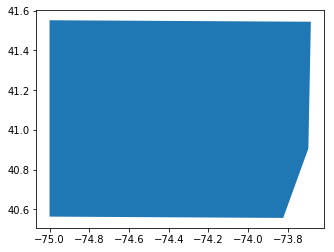

In [122]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

b8b7d14f-7b23-4661-83e5-adcc17d9bf83    Annotation(-74.3569, 41.0611, 'b8b7d14f-7b23-4...
dtype: object

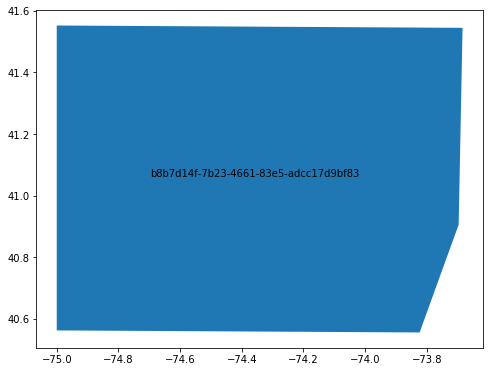

In [123]:
ax = areas.plot(column='uuid', cmap=None, figsize=(8,8))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

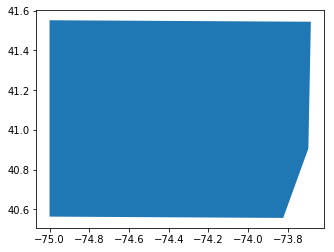

In [136]:
gdf2 = gpd.read_file(bounds)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [126]:
api.download('b8b7d14f-7b23-4661-83e5-adcc17d9bf83')

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.19G/1.19G [17:24<00:00, 1.15MB/s]
MD5 checksumming: 100%|███████████████████████████████████████████████████████████| 1.19G/1.19G [00:18<00:00, 65.2MB/s]


{'id': 'b8b7d14f-7b23-4661-83e5-adcc17d9bf83',
 'title': 'S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_20200609T201659',
 'size': 1188684154,
 'md5': '41E92553BD2E25DED8188F668923573A',
 'date': datetime.datetime(2020, 6, 9, 15, 49, 11, 24000),
 'footprint': 'POLYGON((-73.69643392299747 40.90569382941853,-73.69834274241987 40.900438749076,-73.75140629973073 40.75436506941089,-73.80421508850195 40.608223359175554,-73.82303093989755 40.55614460129639,-75.00023625343321 40.56274991351036,-75.00023981916341 41.551844670066835,-73.68379957458711 41.54431153543986,-73.69643392299747 40.90569382941853))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('b8b7d14f-7b23-4661-83e5-adcc17d9bf83')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 6, 10, 1, 20, 9, 937000),
 'Ingestion Date': datetime.datetime(2020, 6, 10, 1, 19, 26, 504000),
 'path': '.\\S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_20200609T201659.zip',
 'downloaded_bytes': 1188684154}

In [162]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\GRANULE\L2A_T18TWL_A025934_20200609T155403\IMG_DATA\R10m'
b2 = rasterio.open(R10+ '\T18TWL_20200609T154911_B02_10m.jp2') #blue
b3 = rasterio.open(R10+ '\T18TWL_20200609T154911_B03_10m.jp2') #green
b4 = rasterio.open(R10+ '\T18TWL_20200609T154911_B04_10m.jp2') #red
b8 = rasterio.open(R10+ '\T18TWL_20200609T154911_B08_10m.jp2') #nir

RasterioIOError: 'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\GRANULE\L2A_T18TWL_A025934_20200609T155403\IMG_DATA\R10m\T18TWL_20200609T154911_B02_10m.jp2' not recognized as a supported file format.